In [1]:
# represent earthquakes using classes

quake_dicts = [{'place': 'southeast of the Loyalty Islands',
  'time': 1637538745422,
  'mag': 4.5,
  'loc': {'lat': -22.7976, 'lon': 171.963}},
 {'place': '5km ESE of Walker, CA',
  'time': 1637537593330,
  'mag': 1.19,
  'loc': {'lat': 38.504, 'lon': -119.429}},
 {'place': '19 km W of Cheyenne Wells, Colorado',
  'time': 1637537565440,
  'mag': 1.9,
  'loc': {'lat': 38.8551, 'lon': -102.5692}},
 {'place': '4 km NW of Point MacKenzie, Alaska',
  'time': 1637537529410,
  'mag': 1.7,
  'loc': {'lat': 61.3898, 'lon': -150.0462}},
 {'place': '15 km SE of Waynoka, Oklahoma',
  'time': 1637537486109,
  'mag': 1.51,
  'loc': {'lat': 36.473, 'lon': -98.7745}}]

def place_miles(quake):
    place = quake["place"]
    km_idx = place.find("km")
    if km_idx < 0:
        return place
    num = place[:km_idx].strip()
    if not num.isdigit():
        return place
    miles = round(float(num) * 0.621371, 2)
    return f"{miles} miles{place[km_idx+2:]}"

place_miles(quake_dicts[4])

'9.32 miles SE of Waynoka, Oklahoma'

In [2]:
class Earthquake:
    def __init__(self, dict_values):
        self.place = dict_values["place"]
        self.time = dict_values["time"]
        self.mag = dict_values["mag"]
        self.loc = Location(dict_values["loc"]["lat"], dict_values["loc"]["lon"])
    
    def _repr_html_(self):
        size = 6 - int(round(self.mag))
        return f"<h{size}>Mag {self.mag} at {self.place}</h{size}>"
    
    def __repr__(self):
        return f"Mag {self.mag} at {self.place}"

class Location:
    def __init__(self, lat, lon):
        self.lat = lat
        self.lon = lon
        
    def __repr__(self):
        return f"Location({self.lat}, {self.lon})"
        
    def __str__(self):
        return f"Location at lat {self.lat} and lon {self.lon}"
    
    def __eq__(self, other):
        return self.lat == other.lat and self.lon == other.lon

e = Earthquake({
    'place': '15 km SE of Waynoka, Oklahoma',
    'time': 1637537486109,
    'mag': 1.51,
    'loc': {'lat': 36.473, 'lon': -98.7745}
})

In [3]:
[Earthquake(quake_dicts[0]), Earthquake(quake_dicts[1])]

[Mag 4.5 at southeast of the Loyalty Islands,
 Mag 1.19 at 5km ESE of Walker, CA]

In [4]:
Earthquake(quake_dicts[0])

Mag 4.5 at southeast of the Loyalty Islands

In [5]:
Earthquake(quake_dicts[1])

Mag 1.19 at 5km ESE of Walker, CA

In [6]:
Earthquake(quake_dicts[2])

Mag 1.9 at 19 km W of Cheyenne Wells, Colorado

In [7]:
loc = Location(36.47, -98.77)
loc

Location(36.47, -98.77)

In [8]:
loc2 = Location(36.47, -98.77)
loc2

Location(36.47, -98.77)

In [9]:
loc == loc2    # loc.__eq__(loc2)

True

In [10]:
# loc and loc2 are two objects containing the same info, according to __eq__
loc is loc2

False

In [11]:
print(loc)

Location at lat 36.47 and lon -98.77


In [12]:
s = "A\nB"
print(s)    # calling __str__ (for a broad audience)
s           # calling __repr__ (for programmers)

A
B


'A\nB'

In [13]:
earthquakes = []

for d in quake_dicts:
    earthquakes.append(Earthquake(d))
    
earthquakes

[Mag 4.5 at southeast of the Loyalty Islands,
 Mag 1.19 at 5km ESE of Walker, CA,
 Mag 1.9 at 19 km W of Cheyenne Wells, Colorado,
 Mag 1.7 at 4 km NW of Point MacKenzie, Alaska,
 Mag 1.51 at 15 km SE of Waynoka, Oklahoma]

In [14]:
class Earthquake:
    def __init__(self, dict_values):
        self.place = dict_values["place"]
        self.time = dict_values["time"]
        self.mag = dict_values["mag"]
        self.loc = Location(dict_values["loc"]["lat"], dict_values["loc"]["lon"])
    
    def _repr_html_(self):
        size = 6 - int(round(self.mag))
        return f"<h{size}>Mag {self.mag} at {self.place}</h{size}>"
    
    def __repr__(self):
        return f"Mag {self.mag} at {self.place}"
    
    def __lt__(self, quake2):
        return self.mag < quake2.mag

In [15]:
earthquakes = [Earthquake(d) for d in quake_dicts]
earthquakes.sort(reverse=True)  # sort uses <, which uses obj1.__lt__(obj2)
earthquakes

[Mag 4.5 at southeast of the Loyalty Islands,
 Mag 1.9 at 19 km W of Cheyenne Wells, Colorado,
 Mag 1.7 at 4 km NW of Point MacKenzie, Alaska,
 Mag 1.51 at 15 km SE of Waynoka, Oklahoma,
 Mag 1.19 at 5km ESE of Walker, CA]

In [16]:
# earthquakes[0] >= earthquakes[1]   # write the method for __ge__

In [17]:
earthquakes[0] == earthquakes[1]

False

# range()

In [18]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [19]:
r = range(2, 10)
r

range(2, 10)

In [20]:
r[-1]

9

In [21]:
r[0]

2

In [49]:
class Range:   # going to work like range, but we're giving it a different name
    def __init__(self, v1, v2=None):
        if v2 != None:
            self.lower = v1
            self.upper = v2
        else:
            self.lower = 0
            self.upper = v1
            
    def __getitem__(self, name):
        if name >= self.upper-self.lower:
            raise IndexError("index too big")
        if name < 0:
            raise NotImplementedError("negative indexing not supported yet")
        return self.lower+name

r = Range(2, 10)

print(r[0]) # should be 2.   obj[name] => obj.__getitem__(name)

2


In [50]:
for num in r:   # calling r[0], r[1], .... (until there's an exception)
    print(num)

2
3
4
5
6
7
8
9


In [47]:
r[-1] # should be 9

NotImplementedError: negative indexing not supported yet

# Context Managers, to use with the "with" statement

In [53]:
f = open("file.txt", "w")
f.write("hello ")
assert 1 == 2 # trigger a crash
f.write("world")
f.close()  # close triggers a flush of the buffers to the file

AssertionError: 

In [54]:
with open("file.txt", "w") as f:
    f.write("hello ")
    assert 1 == 2 # trigger a crash
    f.write("world")
    # it automatically closes f for us, regardless of errors

AssertionError: 

In [ ]:
# with uses __enter__ and __exit__
# any object with those two special methods
# is called a "context manager"

In [55]:
import matplotlib.pyplot as plt

In [63]:
class DoubleFont:
    def __enter__(self):
        self.old_size = plt.rcParams["font.size"]
        plt.rcParams["font.size"] *= 2
        
    def __exit__(self, exc_type, exc_value, traceback):
        plt.rcParams["font.size"] = self.old_size

(<Figure size 200x200 with 1 Axes>, <AxesSubplot:>)

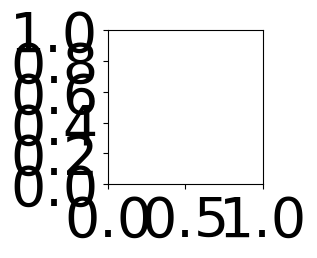

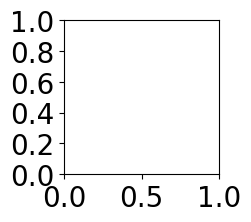

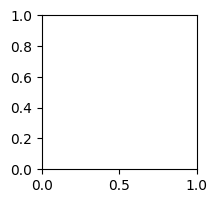

In [66]:
with DoubleFont():  # calls __enter__
    with DoubleFont():
        plt.subplots(figsize=(2,2)) # largest font
    plt.subplots(figsize=(2,2)) # larger font
    # calls __exit__ (even if we crash)
    
plt.subplots(figsize=(2,2)) # go back to regular font